<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/colabnotebooks/bank_churn/Churn.csv')

Data = df.copy()

## Data Overview

In [5]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

In [ ]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no null rows

*   11 numerical columns
*   3 object columns



In [ ]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

No duplicate values

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
Data["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [ ]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


Most account holders are from France with the majority of accountholders being men. Surname isnt likely to be valuable will drop before analysis begins.

## Exploratory Data Analysis

In [6]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [7]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [9]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

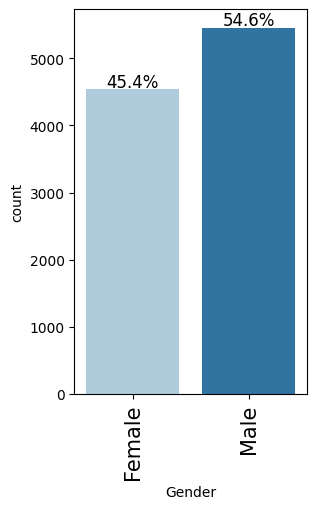

In [ ]:
labeled_barplot(Data, "Gender",perc=True)

54% of the accounts are held by men. No sku in gender that needs to be addressed

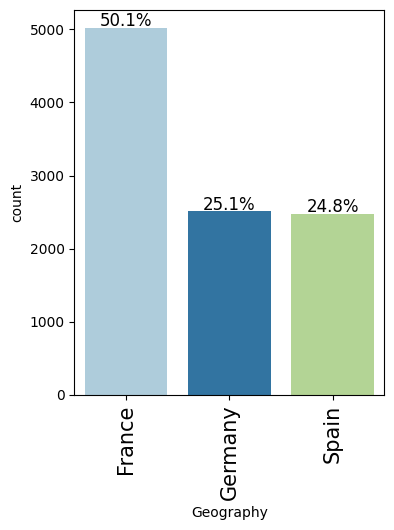

In [ ]:
labeled_barplot(Data, "Geography",perc=True)

50% of account holders are from France with ~25% from Germany and Spain respectively

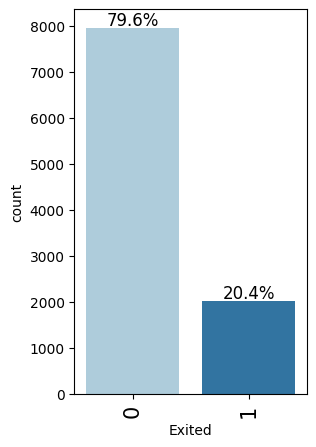

In [ ]:
labeled_barplot(Data,"Exited",perc=True)

Target varaible "exited" shows the actual distrubtion of those who left the bank. The imbalance is substantial - showing the need for an imbalanced classifaction approach

### Bivariate Analysis

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


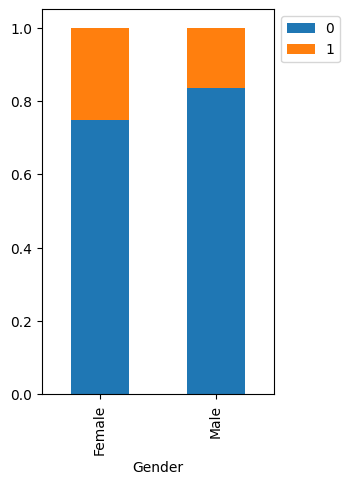

In [ ]:
stacked_barplot(Data, "Gender", "Exited")

roughly 25% of female account holders left the bank while only 15% of male account holders left


Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


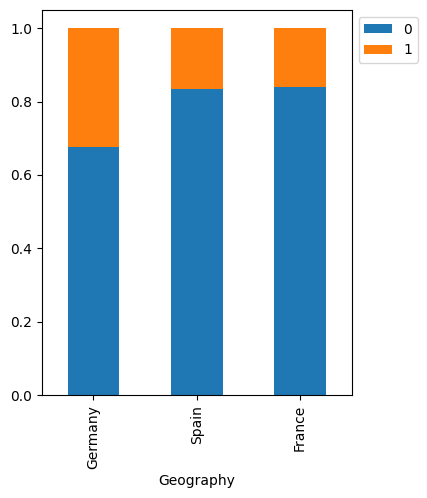

In [ ]:
stacked_barplot(Data, "Geography", "Exited")

Over 30% of accountholders from Germany left the bank, with ~15% from Spain and France who left


Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


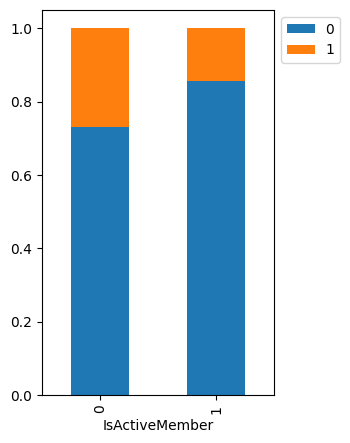

In [ ]:
stacked_barplot(Data, "IsActiveMember", "Exited")

Inactive members have a higher exit rate vs active members

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


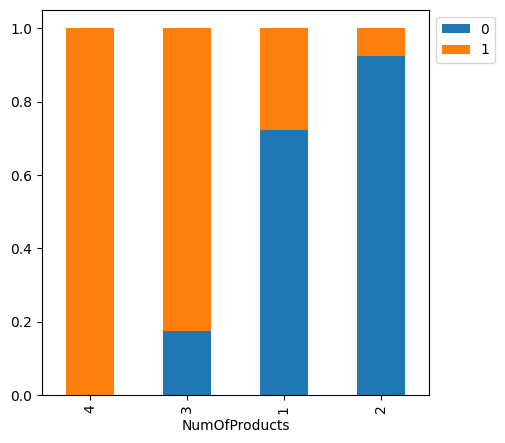

In [ ]:
stacked_barplot(Data, "NumOfProducts", "Exited")

Interestig that the rate of exit grows higher as members utilize MORE bank products. This could suggest issues with bank products that are causing disatisfaction with member's uexperience at the bank

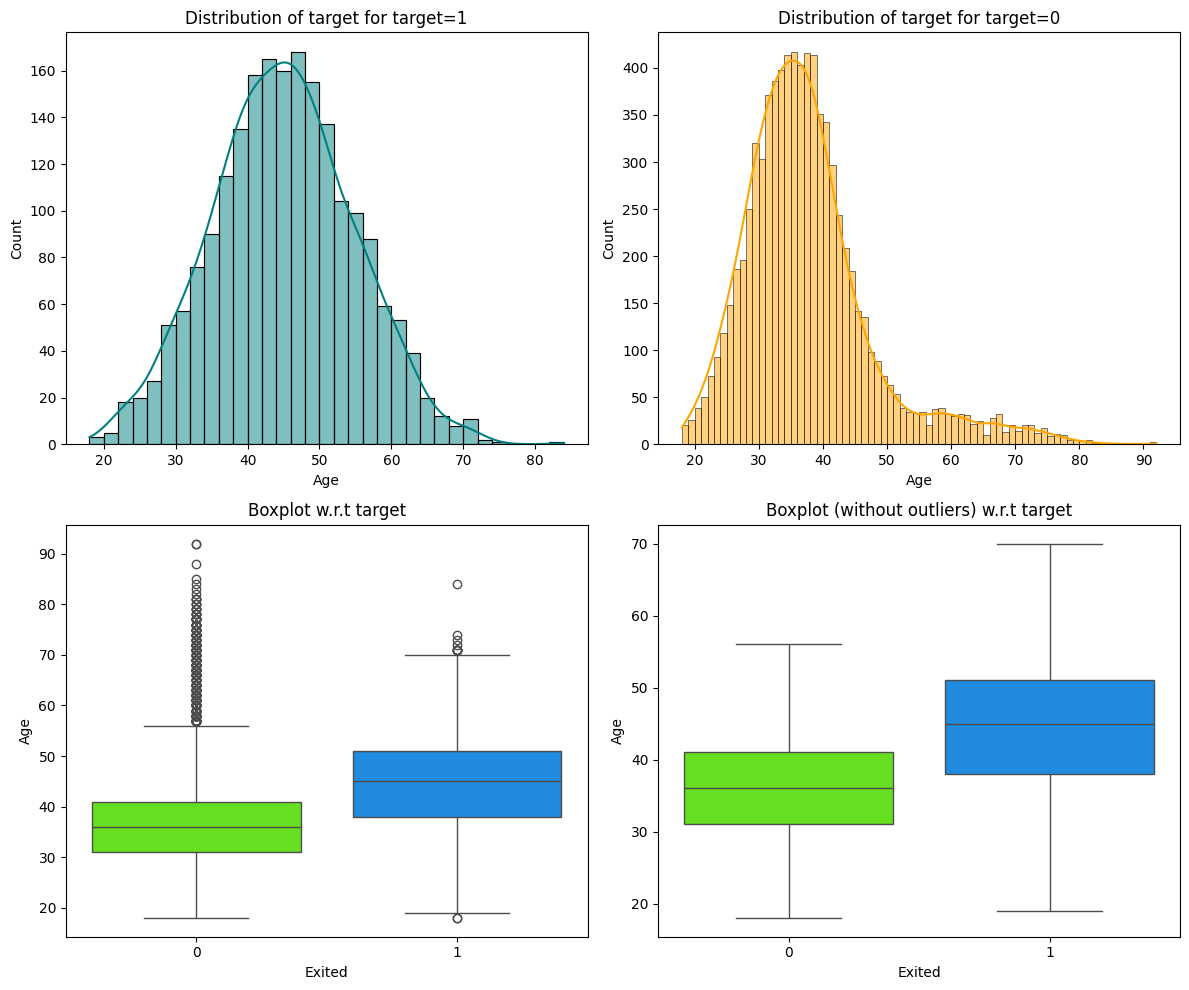

In [ ]:
distribution_plot_wrt_target(Data, "Age", "Exited")

Those exiting ted to be older

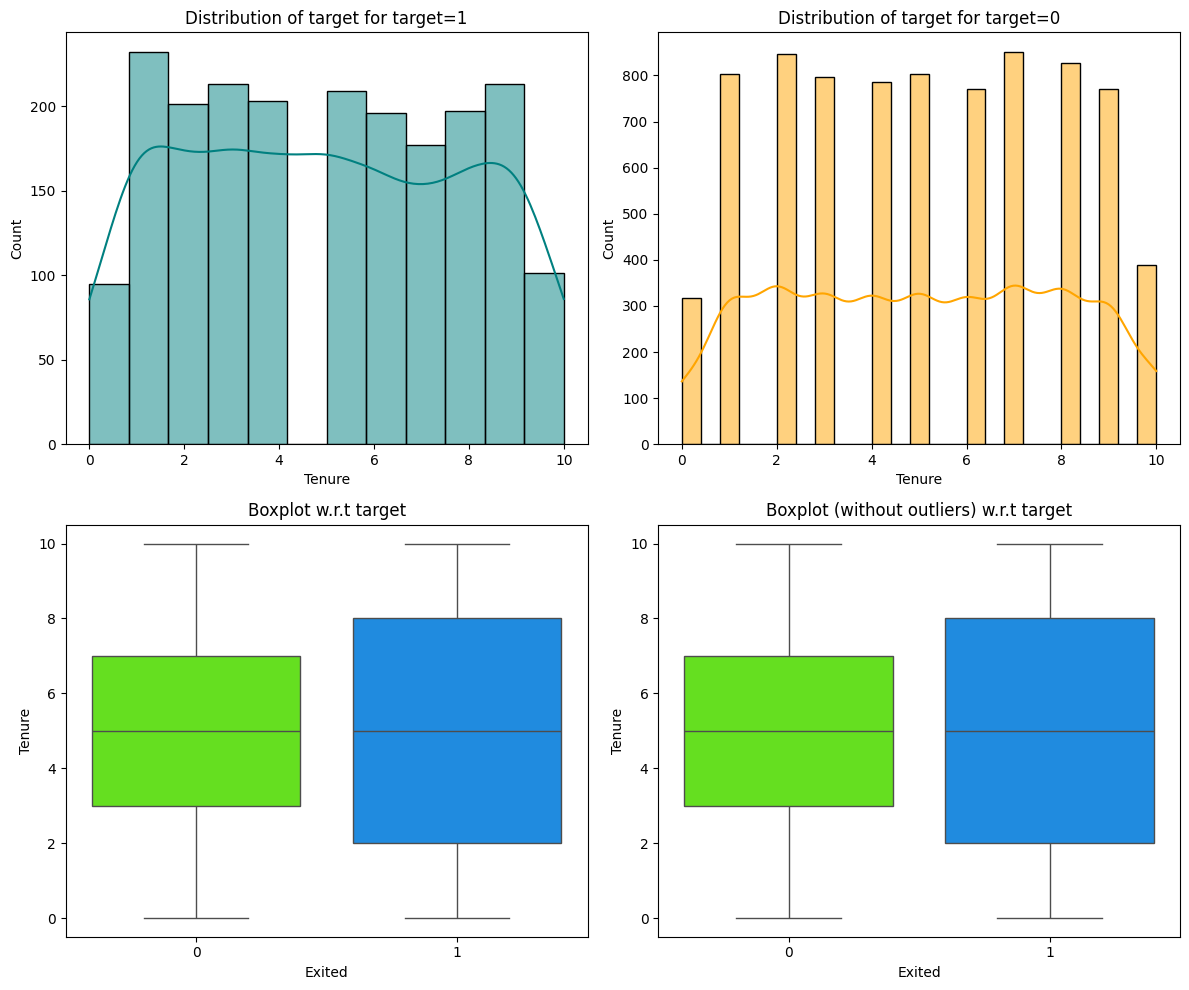

In [ ]:
distribution_plot_wrt_target(Data, "Tenure", "Exited")

No difference in median tenure for members who stay vs exit

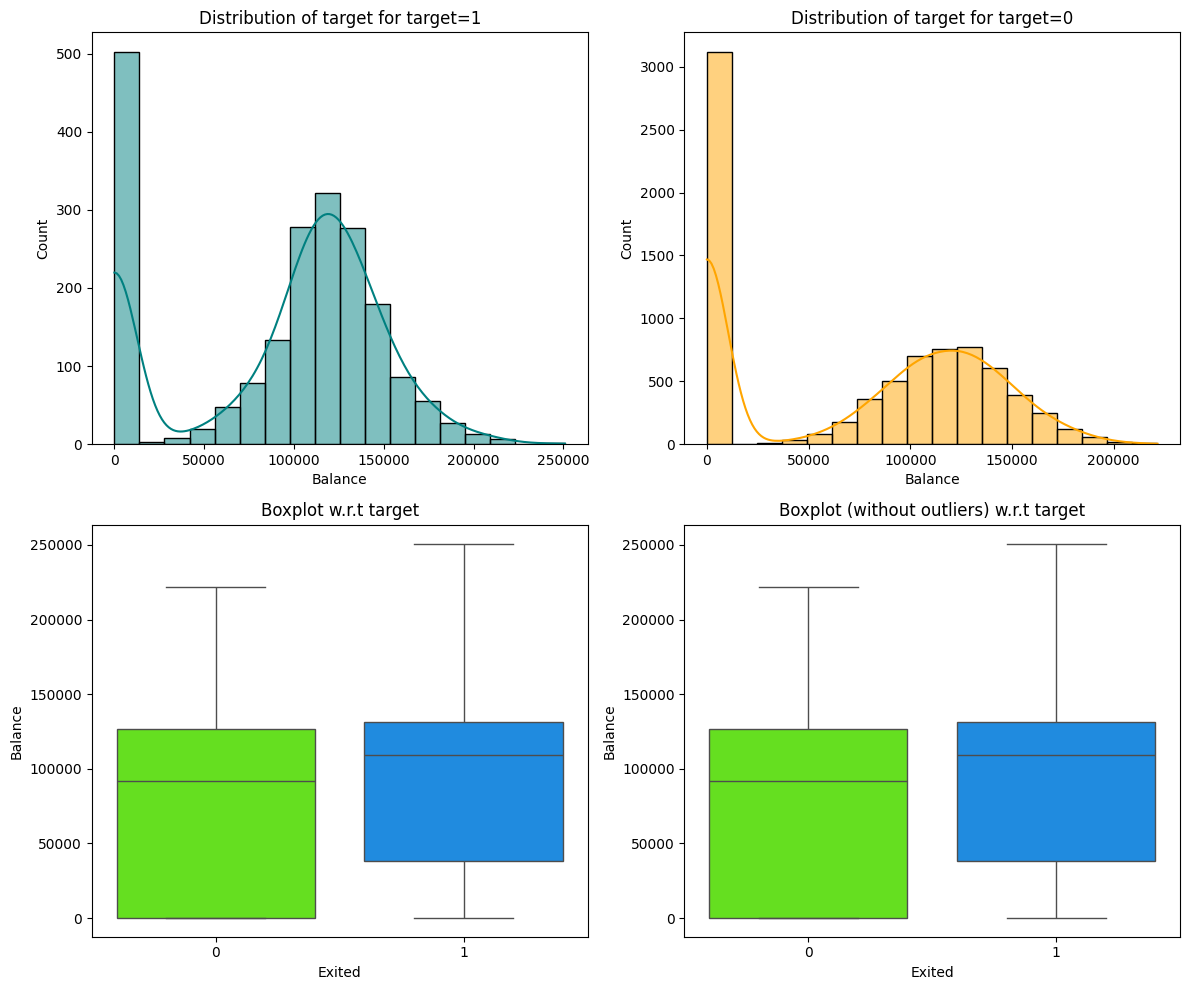

In [ ]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

Those who exit have a higher median balance than those who stay which is a big problem for the bank. Dont want to lose your high balance holders

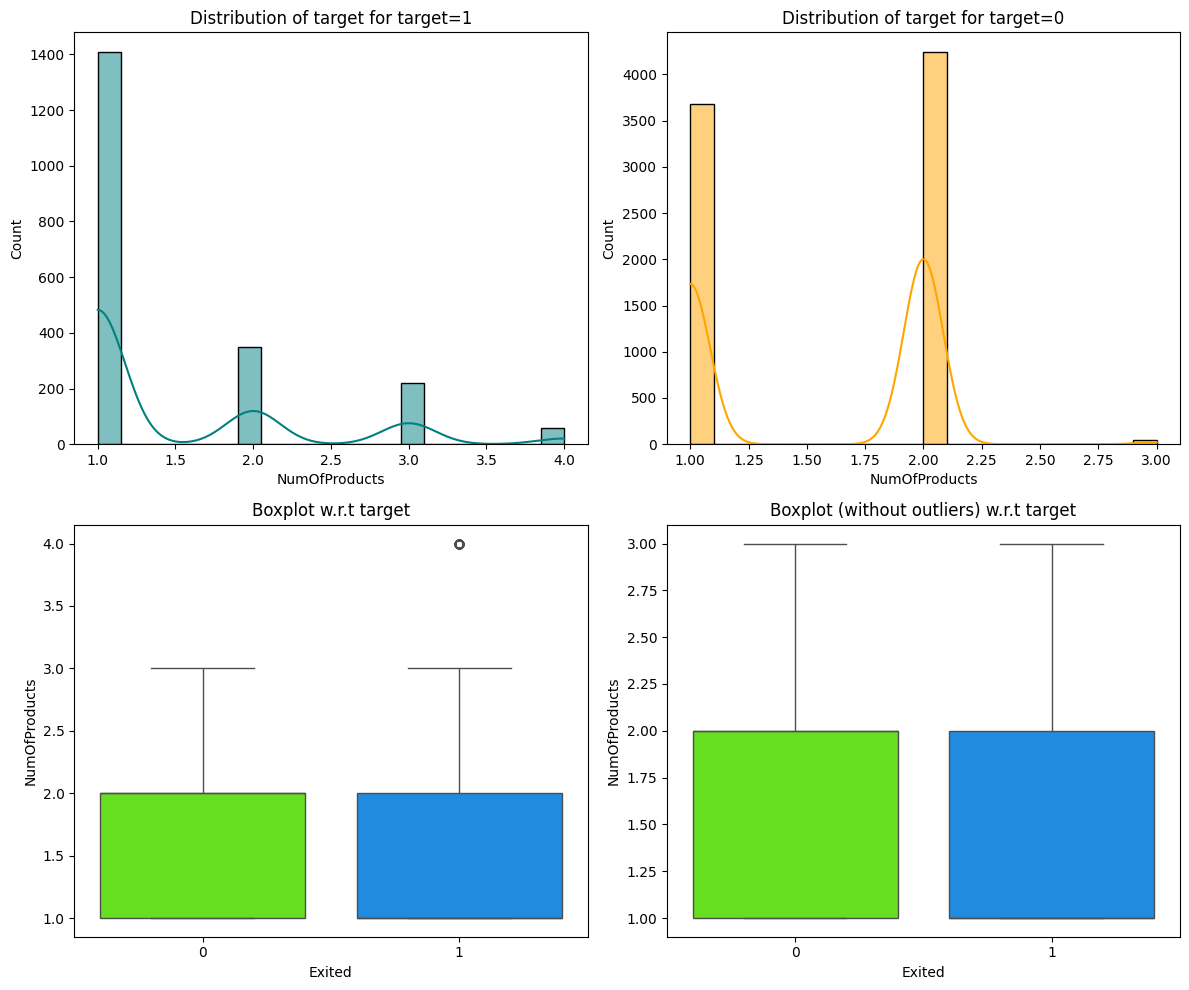

In [ ]:
distribution_plot_wrt_target(Data, "NumOfProducts", "Exited")


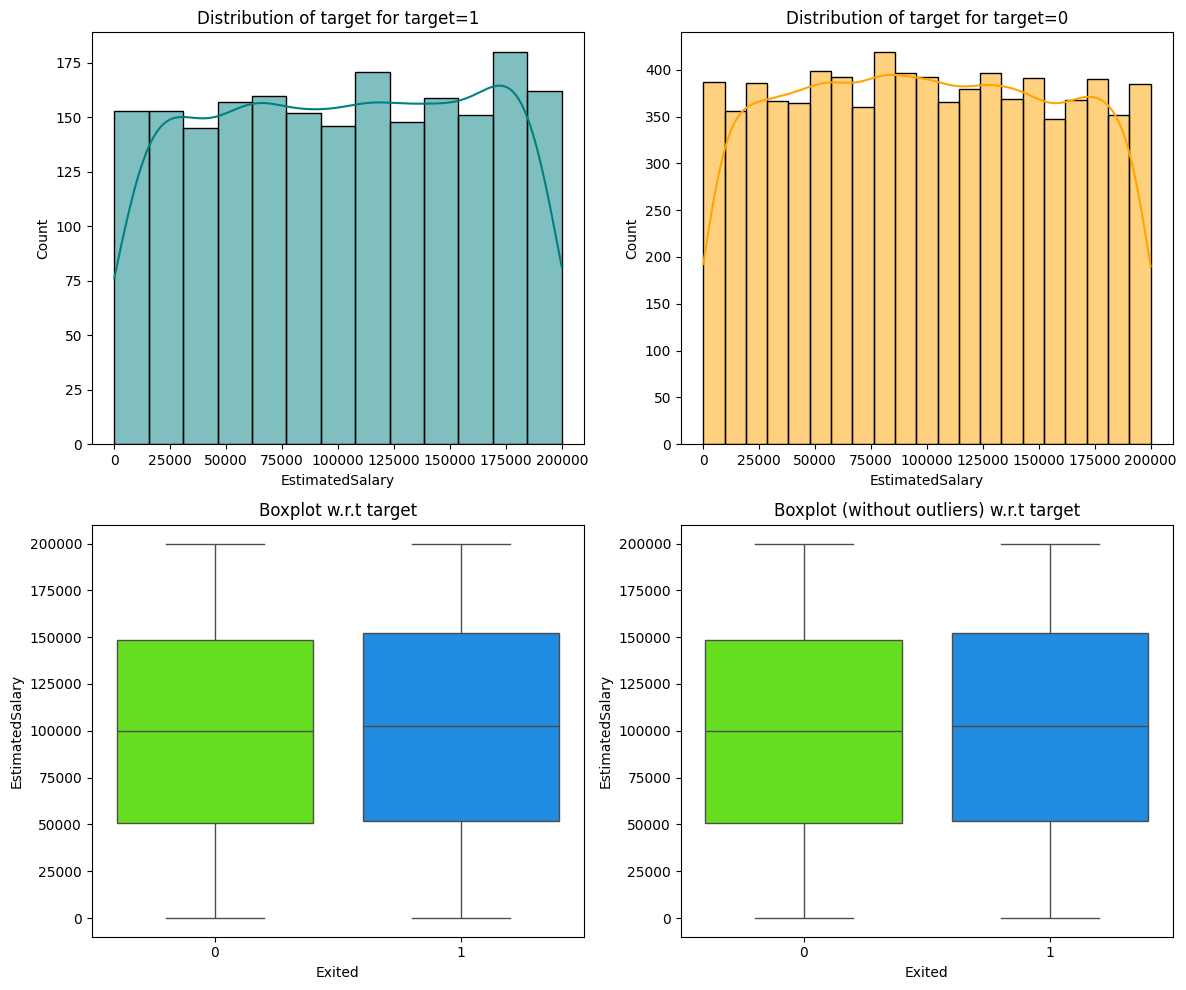

In [ ]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

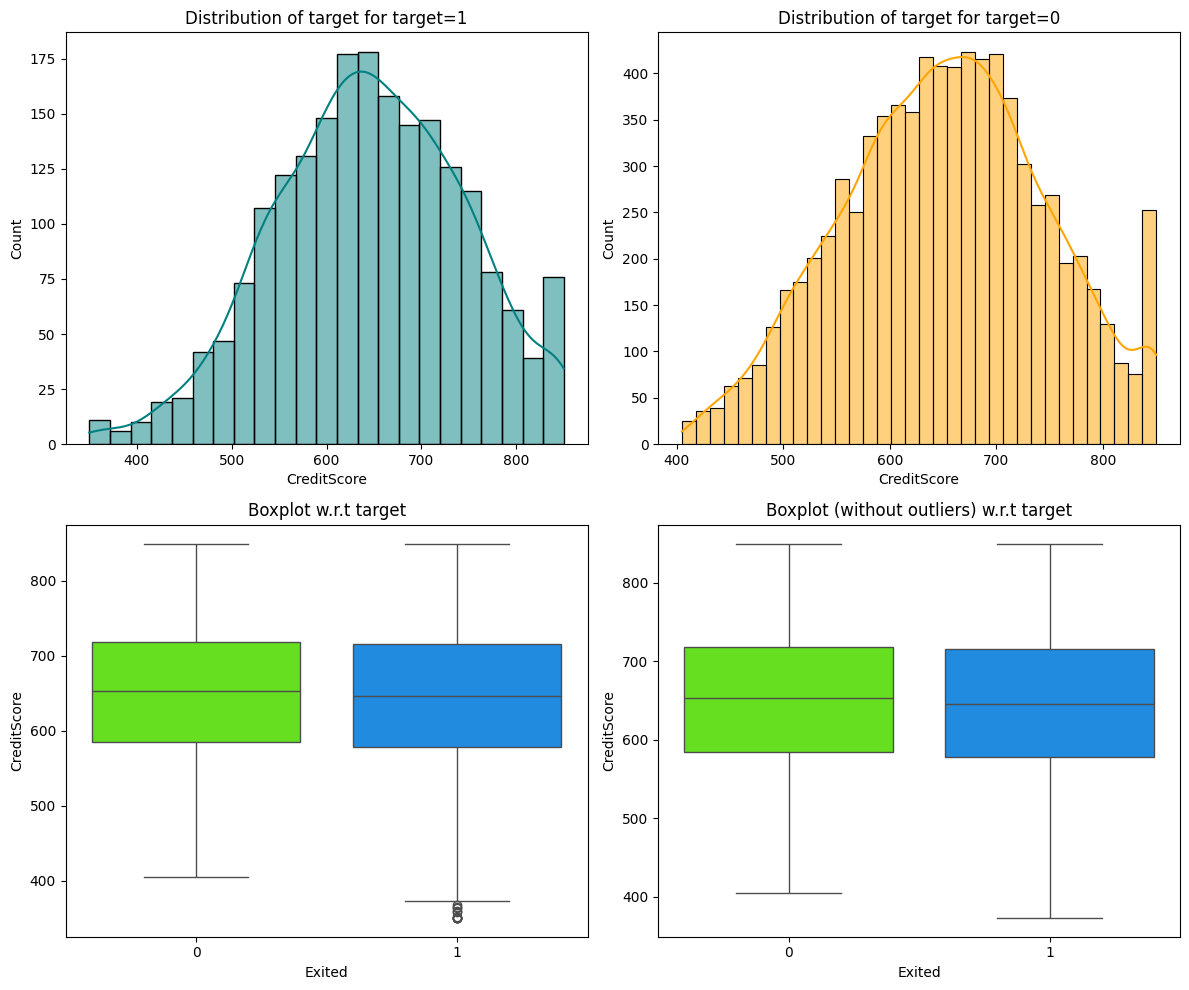

In [ ]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

No differnces in behavior for creditscore, number of products, and salary

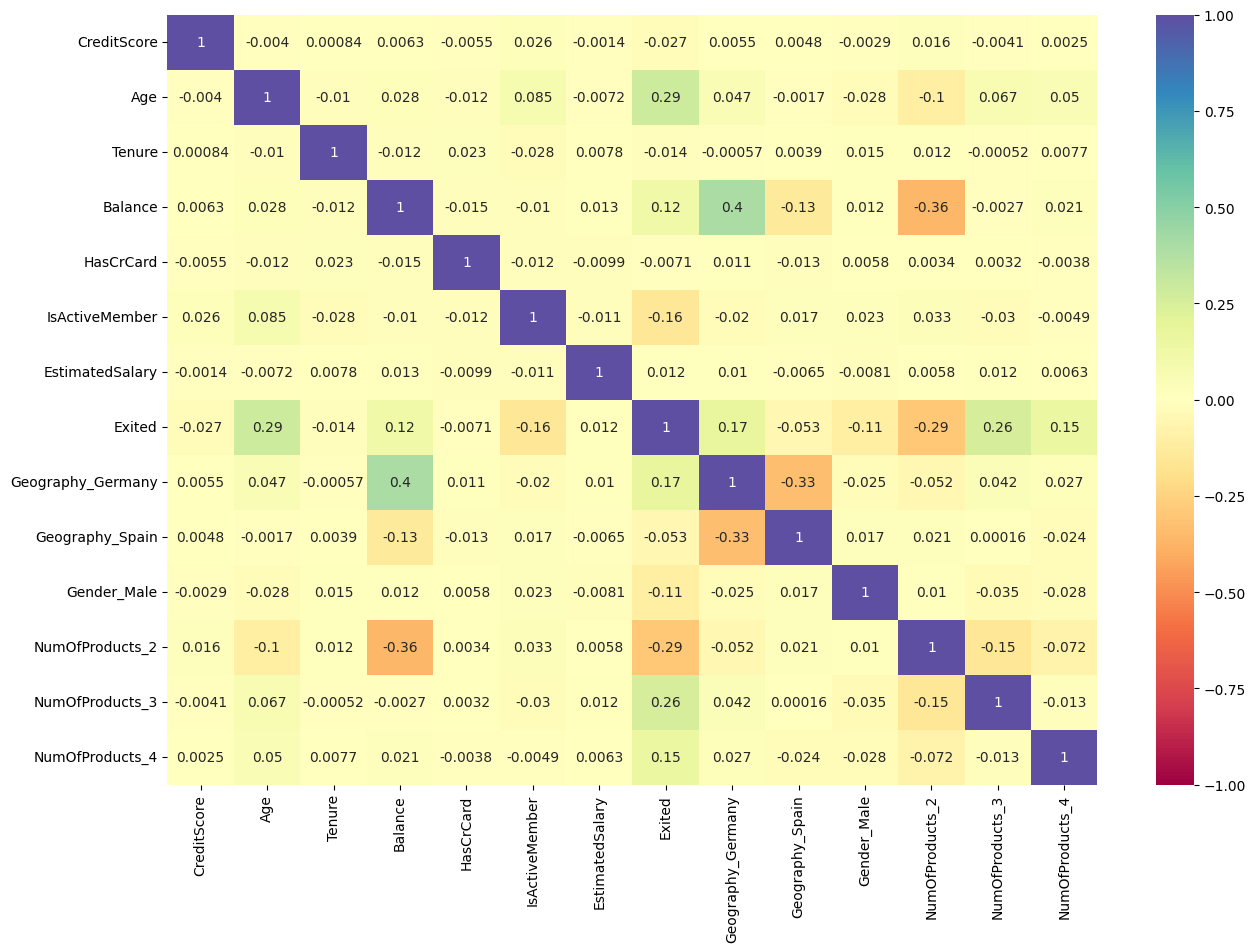

In [111]:

# Calculate the correlation matrix for numeric columns only
corr_matrix = Data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

No strong correlations between columns

## Data Preprocessing

In [10]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
Data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1, inplace=True)

In [11]:
Data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Dummy Variable Creation

In [12]:
# change to categorical: Geography, Gender, NumOfProducts

Data['Geography'] = Data['Geography'].astype('category')
Data['Gender'] = Data['Gender'].astype('category')
Data['NumOfProducts'] = Data['NumOfProducts'].astype('category')


Data = pd.get_dummies(Data, columns=['Geography', 'Gender','NumOfProducts'], dtype=int, drop_first=True)
Data.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,1,0,0,0,0
2,502,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0,0,0,0


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   HasCrCard          10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
 10  Gender_Male        10000 non-null  int64  
 11  NumOfProducts_2    10000 non-null  int64  
 12  NumOfProducts_3    10000 non-null  int64  
 13  NumOfProducts_4    10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


### Train-validation-test Split

In [14]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data['Exited']

In [16]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1, stratify=y_train
)
print(X_train.shape, X_val.shape, X_test.shape,y_train.shape, y_val.shape, y_test.shape)

(6000, 13) (2000, 13) (2000, 13) (6000,) (2000,) (2000,)


### Data Normalization

In [18]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = transformer.fit_transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = transformer.fit_transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = transformer.fit_transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

In [19]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [20]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Model Evaluation Criterion

A model can make wrong predictions in the following ways:

Predicting a member is looking to exit, when he/she is not looking exiting.
Predicting a member is not looking to exit, when he/she is in fact looking to exit.
Which case is more important?

Predicting a member is not looking to exit, when he/she is in fact looking to exit is the most important error to account for. The bank will want to ensure these memnbers get the marketing material and other opportunities to rengage with the bank before leaving. If the model predicts a member is looking to exit, when he/she is not looking exit then there is no significant downside.

How to reduce this loss i.e need to reduce False Negatives?

The model will focus on recall to optimize for this decision criteria

In [21]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int))
cw_dict = {i: cw[i] for i in range(len(cw))}

cw_dict

{0: 1.2557555462536627, 1: 4.909983633387888}

In [22]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 35
batch_size = 64

### Neural Network with SGD Optimizer

In [23]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [24]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [28]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/35
94/94 [==============================] - 2s 6ms/step - loss: 1.3843 - val_loss: 0.7123
Epoch 2/35
94/94 [==============================] - 0s 4ms/step - loss: 1.3641 - val_loss: 0.6973
Epoch 3/35
94/94 [==============================] - 0s 4ms/step - loss: 1.3511 - val_loss: 0.6882
Epoch 4/35
94/94 [==============================] - 0s 4ms/step - loss: 1.3369 - val_loss: 0.6841
Epoch 5/35
94/94 [==============================] - 0s 5ms/step - loss: 1.3207 - val_loss: 0.6786
Epoch 6/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2997 - val_loss: 0.6781
Epoch 7/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2766 - val_loss: 0.6643
Epoch 8/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2526 - val_loss: 0.6519
Epoch 9/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2277 - val_loss: 0.6344
Epoch 10/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2033 - val_loss: 0.6262
Epoch 11/35
94/94 [

In [29]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.960376501083374


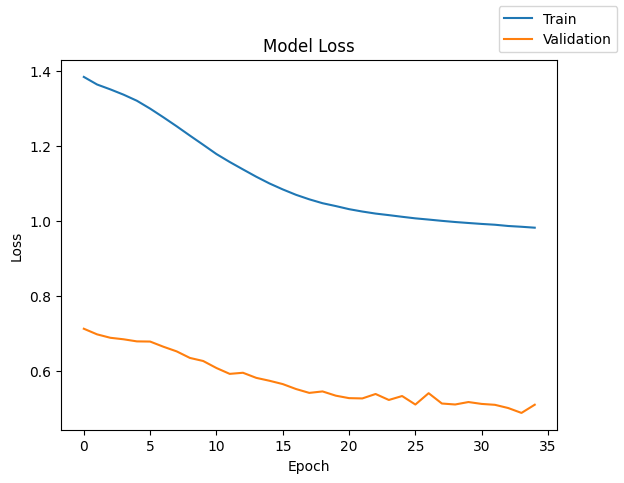

In [30]:
plot(history,'loss')

In [31]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

188/188 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7855,0.7855,0.835118,0.800531


In [32]:
model_0_valid_perf = model_performance_classification(model, X_val, y_val)
model_0_valid_perf

63/63 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.783,0.783,0.834231,0.79841


Train Recall score of train ~.75 and validation ~.75 indicating consistent tperformance between models

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [33]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [34]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [37]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/35
94/94 [==============================] - 2s 6ms/step - loss: 1.3914 - val_loss: 0.6796
Epoch 2/35
94/94 [==============================] - 0s 4ms/step - loss: 1.3561 - val_loss: 0.6681
Epoch 3/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2526 - val_loss: 0.5655
Epoch 4/35
94/94 [==============================] - 0s 4ms/step - loss: 1.1156 - val_loss: 0.5330
Epoch 5/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0574 - val_loss: 0.4848
Epoch 6/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0313 - val_loss: 0.4936
Epoch 7/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0175 - val_loss: 0.4910
Epoch 8/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0048 - val_loss: 0.4893
Epoch 9/35
94/94 [==============================] - 0s 5ms/step - loss: 0.9980 - val_loss: 0.4820
Epoch 10/35
94/94 [==============================] - 0s 4ms/step - loss: 0.9874 - val_loss: 0.4973
Epoch 11/35
94/94 [

In [38]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.20021390914917


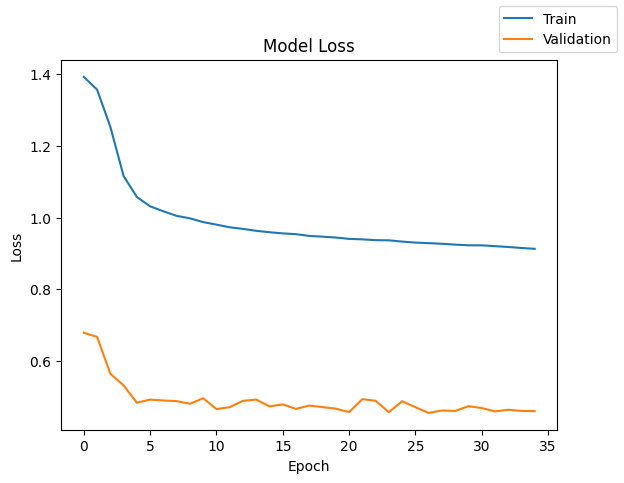

In [39]:
plot(history,'loss')

In [40]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

188/188 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796833,0.796833,0.843696,0.810801


In [42]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

63/63 [==============================] - 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.789,0.789,0.837631,0.803656


Improvement in the recall score: Test ~.80 and validate ~.79 Slightly improving vs SGD optimizer

### Neural Network with Adam Optimizer and Dropout

In [43]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [44]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [46]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [47]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/35
94/94 [==============================] - 5s 8ms/step - loss: 1.3893 - val_loss: 0.6777
Epoch 2/35
94/94 [==============================] - 1s 7ms/step - loss: 1.3754 - val_loss: 0.6743
Epoch 3/35
94/94 [==============================] - 1s 8ms/step - loss: 1.3510 - val_loss: 0.6572
Epoch 4/35
94/94 [==============================] - 1s 7ms/step - loss: 1.3163 - val_loss: 0.6276
Epoch 5/35
94/94 [==============================] - 1s 7ms/step - loss: 1.2777 - val_loss: 0.5987
Epoch 6/35
94/94 [==============================] - 1s 8ms/step - loss: 1.2536 - val_loss: 0.5744
Epoch 7/35
94/94 [==============================] - 1s 10ms/step - loss: 1.2357 - val_loss: 0.5506
Epoch 8/35
94/94 [==============================] - 0s 5ms/step - loss: 1.2104 - val_loss: 0.5489
Epoch 9/35
94/94 [==============================] - 0s 5ms/step - loss: 1.2046 - val_loss: 0.5275
Epoch 10/35
94/94 [==============================] - 1s 7ms/step - loss: 1.1810 - val_loss: 0.5325
Epoch 11/35
94/94 

In [48]:
print("Time taken in seconds ",end-start)

Time taken in seconds  27.48608136177063


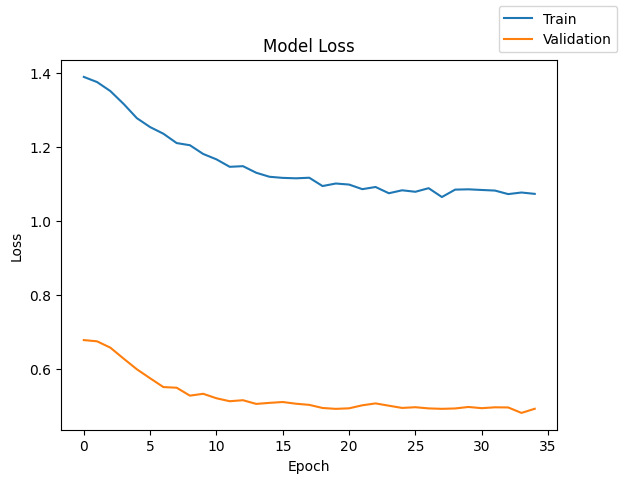

In [49]:
plot(history,'loss')

In [50]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

188/188 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7895,0.7895,0.832772,0.80321


In [51]:
model_2_valid_perf = model_performance_classification(model, X_val, y_val)
model_2_valid_perf

63/63 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7875,0.7875,0.83452,0.801963


Very similar performance - no noticable gains from dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [75]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [76]:
# New import for SMOTE
from imblearn.over_sampling import SMOTE

In [77]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('After UpSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of X_train: (9556, 13)
After UpSampling, the shape of y_train: (9556,) 



In [78]:
# Existing code to initialize the neural network
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=X_train_smote.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Existing code to define the optimizer and compile the model
optimizer = tf.keras.optimizers.SGD()  # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [80]:
# Existing code to train the model
start = time.time()
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/35
150/150 [==============================] - 2s 8ms/step - loss: 1.5454 - val_loss: 1.1860
Epoch 2/35
150/150 [==============================] - 1s 4ms/step - loss: 1.3618 - val_loss: 1.1238
Epoch 3/35
150/150 [==============================] - 1s 4ms/step - loss: 1.2623 - val_loss: 1.0779
Epoch 4/35
150/150 [==============================] - 1s 4ms/step - loss: 1.1877 - val_loss: 1.0027
Epoch 5/35
150/150 [==============================] - 1s 4ms/step - loss: 1.1336 - val_loss: 0.9692
Epoch 6/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0970 - val_loss: 0.9294
Epoch 7/35
150/150 [==============================] - 1s 5ms/step - loss: 1.0714 - val_loss: 0.9070
Epoch 8/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0536 - val_loss: 0.8970
Epoch 9/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0404 - val_loss: 0.8423
Epoch 10/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0313 - val_loss: 0.8843

In [81]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.78418970108032


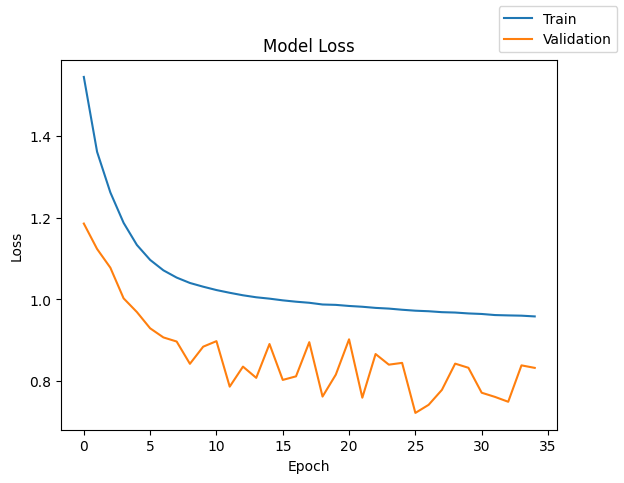

In [82]:
plot(history,'loss')

In [83]:
model_3_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_3_train_perf

299/299 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.742884,0.742884,0.796707,0.73067


In [61]:
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf

63/63 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.579,0.579,0.826509,0.61396


SMOTE method underperforms original SGD model by wide margin

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [65]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [66]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9556, 13)
After UpSampling, the shape of train_y: (9556,) 



In [67]:
# Existing code to initialize the neural network
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=X_train_smote.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [69]:
# Existing code to train the model
start = time.time()
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/35
150/150 [==============================] - 2s 5ms/step - loss: 1.7549 - val_loss: 1.0986
Epoch 2/35
150/150 [==============================] - 1s 4ms/step - loss: 1.3231 - val_loss: 1.0547
Epoch 3/35
150/150 [==============================] - 1s 4ms/step - loss: 1.1857 - val_loss: 1.0111
Epoch 4/35
150/150 [==============================] - 1s 4ms/step - loss: 1.1385 - val_loss: 1.0087
Epoch 5/35
150/150 [==============================] - 1s 4ms/step - loss: 1.1154 - val_loss: 1.0100
Epoch 6/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0999 - val_loss: 0.9870
Epoch 7/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0864 - val_loss: 0.9760
Epoch 8/35
150/150 [==============================] - 1s 5ms/step - loss: 1.0733 - val_loss: 0.9786
Epoch 9/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0622 - val_loss: 0.9177
Epoch 10/35
150/150 [==============================] - 1s 4ms/step - loss: 1.0511 - val_loss: 0.9262

In [70]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.087680339813232


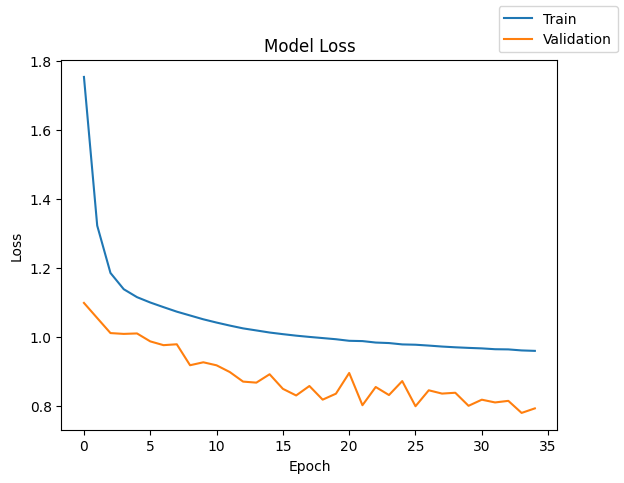

In [71]:
plot(history,'loss')

In [72]:
model_4_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_4_train_perf

299/299 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.764964,0.764964,0.804518,0.757076


In [74]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf

63/63 [==============================] - 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.63,0.63,0.819866,0.664967


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [87]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [88]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9556, 13)
After UpSampling, the shape of train_y: (9556,) 



In [89]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [90]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [91]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/35
94/94 [==============================] - 3s 10ms/step - loss: 1.4001 - val_loss: 0.6910
Epoch 2/35
94/94 [==============================] - 1s 7ms/step - loss: 1.3432 - val_loss: 0.6641
Epoch 3/35
94/94 [==============================] - 0s 5ms/step - loss: 1.3167 - val_loss: 0.6449
Epoch 4/35
94/94 [==============================] - 0s 5ms/step - loss: 1.3019 - val_loss: 0.6237
Epoch 5/35
94/94 [==============================] - 0s 5ms/step - loss: 1.2722 - val_loss: 0.5971
Epoch 6/35
94/94 [==============================] - 1s 6ms/step - loss: 1.2503 - val_loss: 0.5811
Epoch 7/35
94/94 [==============================] - 0s 5ms/step - loss: 1.2170 - val_loss: 0.5522
Epoch 8/35
94/94 [==============================] - 0s 5ms/step - loss: 1.2010 - val_loss: 0.5528
Epoch 9/35
94/94 [==============================] - 0s 5ms/step - loss: 1.1857 - val_loss: 0.5445
Epoch 10/35
94/94 [==============================] - 0s 5ms/step - loss: 1.1579 - val_loss: 0.5308
Epoch 11/35
94/94 

In [92]:
print("Time taken in seconds ",end-start)

Time taken in seconds  21.76825189590454


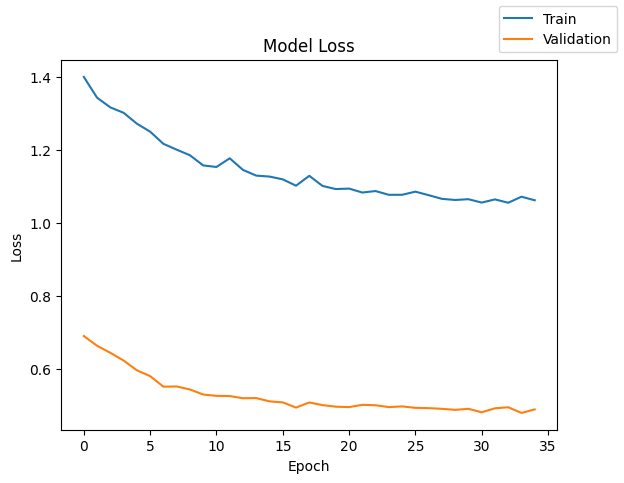

In [93]:
plot(history,'loss')

In [94]:
model_5_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_5_train_perf

299/299 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.786103,0.786103,0.78637,0.786053


In [95]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf

63/63 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.792,0.792,0.835877,0.805681


## Model Performance Comparison and Final Model Selection

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam + Dropout [0.4,0.2,0.2], No Regularization)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam + Dropout [0.4,0.2,0.2], SMOTE)"
]

In [97]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam + Dropout [0.4,0.2,0.2], No Regularization)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam + Dropout [0.4,0.2,0.2], SMOTE)"
]

In [98]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam + Dropout [0.4,0.2,0.2], No Regularization)","Neural Network (SGD, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam + Dropout [0.4,0.2,0.2], SMOTE)"
Accuracy,0.785500,0.796833,0.789500,0.742884,0.764964,0.786103
Recall,0.785500,0.796833,0.789500,0.742884,0.764964,0.786103
Precision,0.835118,0.843696,0.832772,0.796707,0.804518,0.786370
F1 Score,0.800531,0.810801,0.803210,0.730670,0.757076,0.786053


In [99]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam + Dropout [0.4,0.2,0.2], No Regularization)","Neural Network (SGD, SMOTE)","Neural Network (Adam, SMOTE)","Neural Network (Adam + Dropout [0.4,0.2,0.2], SMOTE)"
Accuracy,0.783000,0.789000,0.787500,0.579000,0.630000,0.792000
Recall,0.783000,0.789000,0.787500,0.579000,0.630000,0.792000
Precision,0.834231,0.837631,0.834520,0.826509,0.819866,0.835877
F1 Score,0.798410,0.803656,0.801963,0.613960,0.664967,0.805681


In [100]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

Neural Network (SGD, No Regularization)                             0.002500
Neural Network (Adam, No Regularization)                            0.007833
Neural Network (Adam + Dropout [0.4,0.2,0.2], No Regularization)    0.002000
Neural Network (SGD, SMOTE)                                         0.163884
Neural Network (Adam, SMOTE)                                        0.134964
Neural Network (Adam + Dropout [0.4,0.2,0.2], SMOTE)               -0.005897
Name: Recall, dtype: float64

Neural Network (Adam, No Regularization) was the bets performing model of the group with train recall at ~.80 and val recall at ~.79


In [102]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [103]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [105]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/35
94/94 [==============================] - 2s 6ms/step - loss: 1.3746 - val_loss: 0.6841
Epoch 2/35
94/94 [==============================] - 0s 4ms/step - loss: 1.2732 - val_loss: 0.6170
Epoch 3/35
94/94 [==============================] - 0s 4ms/step - loss: 1.1411 - val_loss: 0.5608
Epoch 4/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0626 - val_loss: 0.5209
Epoch 5/35
94/94 [==============================] - 0s 4ms/step - loss: 1.0199 - val_loss: 0.4883
Epoch 6/35
94/94 [==============================] - 0s 4ms/step - loss: 0.9950 - val_loss: 0.4953
Epoch 7/35
94/94 [==============================] - 0s 5ms/step - loss: 0.9818 - val_loss: 0.4824
Epoch 8/35
94/94 [==============================] - 0s 4ms/step - loss: 0.9711 - val_loss: 0.4953
Epoch 9/35
94/94 [==============================] - 0s 4ms/step - loss: 0.9663 - val_loss: 0.4752
Epoch 10/35
94/94 [==============================] - 0s 4ms/step - loss: 0.9605 - val_loss: 0.4983
Epoch 11/35
94/94 [

In [106]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [107]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4778
           1       0.50      0.77      0.61      1222

    accuracy                           0.80      6000
   macro avg       0.72      0.79      0.73      6000
weighted avg       0.84      0.80      0.81      6000



In [108]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1592
           1       0.48      0.76      0.59       408

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [109]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.71      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.77      0.79      2000



Weighted Recall score of test data is .77. Recall score is good but additional efforts shold be employed to improve (batch size, epoch, and layer experimentation)


## Actionable Insights and Business Recommendations

The bank can employ this model with reasonable accuracy to identify those members who are likely to exit the bank. Marketing should be employed to these "at risk" members to provide incetives to stay with the bank and expand the products and services they utilize at the bank. A more thorough review of bank product should be undertaken as the rate of exit grows higher as members use more bank products.    

*



In [112]:
!jupyter nbconvert --to html '/content/drive/MyDrive/colabnotebooks/bank_churn/bank_churn_Bingham_full_code.ipynb' --output '/content/drive/MyDrive/colabnotebooks/bank_churn/neural_network_fullcode_bingham.html'

[NbConvertApp] Converting notebook /content/drive/MyDrive/colabnotebooks/bank_churn/bank_churn_Bingham_full_code.ipynb to html
[NbConvertApp] Writing 2042007 bytes to /content/drive/MyDrive/colabnotebooks/bank_churn/neural_network_fullcode_bingham.html


<font size=6 color='blue'>Power Ahead</font>
___